# Simulação de Uso de Energias Renováveis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_geracao = pd.read_csv('/content/geracao_solar.csv')

## Simulação On-Grid - Casa


In [42]:
df_casa = pd.read_csv('/content/consumo_casa.csv')

In [43]:
df_casa['Geracao_kWh'] = df_geracao['Geracao_kWh']

df_casa['Usado_do_Solar'] = np.minimum(
    df_casa['Consumo_kWh'],
    df_casa['Geracao_kWh']
)

df_casa['Injetado_na_Rede'] = np.where(
    df_casa['Geracao_kWh'] > df_casa['Consumo_kWh'],
    df_casa['Geracao_kWh'] - df_casa['Consumo_kWh'],
    0
)

df_casa['Usado_da_Rede'] = np.where(
    df_casa['Consumo_kWh'] > df_casa['Geracao_kWh'],
    df_casa['Consumo_kWh'] - df_casa['Geracao_kWh'],
    0
)

df_casa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede
0,Jan,420,380,380,0,40
1,Fev,390,360,360,0,30
2,Mar,370,400,370,30,0
3,Abr,350,420,350,70,0
4,Mai,330,450,330,120,0


### Calculos

In [44]:
#custo e economia
tarifa = 0.90  # R$/kWh

df_casa['Custo_sem_Solar'] = df_casa['Consumo_kWh'] * tarifa
df_casa['Custo_com_Solar'] = df_casa['Usado_da_Rede'] * tarifa
df_casa['Economia_R$'] = df_casa['Custo_sem_Solar'] - df_casa['Custo_com_Solar']

df_casa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$
0,Jan,420,380,380,0,40,378.0,36.0,342.0
1,Fev,390,360,360,0,30,351.0,27.0,324.0
2,Mar,370,400,370,30,0,333.0,0.0,333.0
3,Abr,350,420,350,70,0,315.0,0.0,315.0
4,Mai,330,450,330,120,0,297.0,0.0,297.0


In [45]:
# CO₂ evitado
fator_co2 = 0.084  # kg de CO2 por kWh
df_casa['CO2_Evitado_kg'] = df_casa['Usado_do_Solar'] * fator_co2

df_casa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$,CO2_Evitado_kg
0,Jan,420,380,380,0,40,378.0,36.0,342.0,31.92
1,Fev,390,360,360,0,30,351.0,27.0,324.0,30.24
2,Mar,370,400,370,30,0,333.0,0.0,333.0,31.08
3,Abr,350,420,350,70,0,315.0,0.0,315.0,29.40
4,Mai,330,450,330,120,0,297.0,0.0,297.0,27.72


In [46]:
df_casa['Perc_Fotovoltaico_%'] = (df_casa['Usado_do_Solar'] / df_casa['Consumo_kWh']) * 100

df_casa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$,CO2_Evitado_kg,Perc_Fotovoltaico_%
0,Jan,420,380,380,0,40,378.0,36.0,342.0,31.92,90.476190
1,Fev,390,360,360,0,30,351.0,27.0,324.0,30.24,92.307692
2,Mar,370,400,370,30,0,333.0,0.0,333.0,31.08,100.000000
3,Abr,350,420,350,70,0,315.0,0.0,315.0,29.40,100.000000
4,Mai,330,450,330,120,0,297.0,0.0,297.0,27.72,100.000000


In [47]:
total_consumo_casa = df_casa['Consumo_kWh'].sum()
total_geracao_casa = df_casa['Geracao_kWh'].sum()
total_economia_casa = df_casa['Economia_R$'].sum()
total_co2_casa = df_casa['CO2_Evitado_kg'].sum()

perc_fv_casa = (
    df_casa['Usado_do_Solar'].sum() / df_casa['Consumo_kWh'].sum()
) * 100

print(f"Consumo anual da casa: {total_consumo_casa:.2f} kWh")
print(f"Geração anual da casa: {total_geracao_casa:.2f} kWh")
print(f"Economia anual da casa: R$ {total_economia_casa:.2f}")
print(f"CO2 evitado no ano: {total_co2_casa:.2f} kg")
print(f"Cobertura fotovoltaica: {perc_fv_casa:.2f}%")

Consumo anual da casa: 4595.00 kWh
Geração anual da casa: 5020.00 kWh
Economia anual da casa: R$ 3996.00
CO2 evitado no ano: 372.96 kg
Cobertura fotovoltaica: 96.63%


### Gráficos


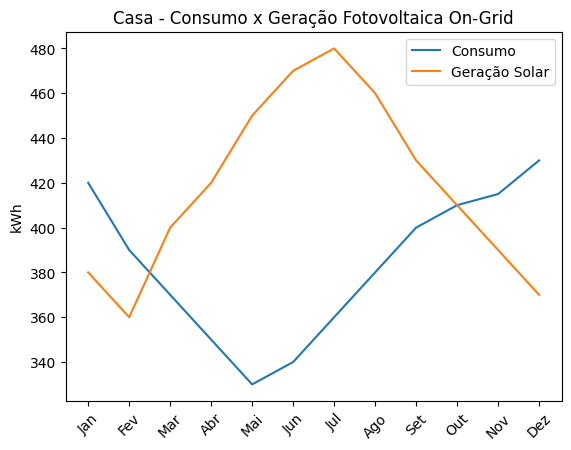

In [48]:
plt.figure()
plt.plot(df_casa['Mes'], df_casa['Consumo_kWh'], label='Consumo')
plt.plot(df_casa['Mes'], df_casa['Geracao_kWh'], label='Geração Solar')
plt.xticks(rotation=45)
plt.title('Casa - Consumo x Geração Fotovoltaica On-Grid')
plt.ylabel('kWh')
plt.legend()
plt.show()


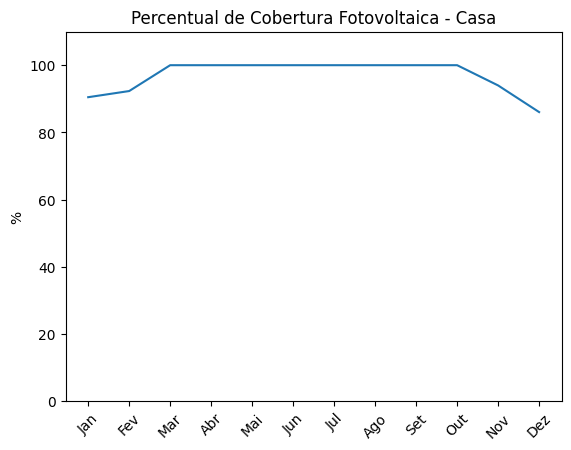

In [49]:
plt.figure()
plt.plot(df_casa['Mes'], df_casa['Perc_Fotovoltaico_%'])
plt.xticks(rotation=45)
plt.title('Percentual de Cobertura Fotovoltaica - Casa')
plt.ylabel('%')
plt.ylim(0, 110)
plt.show()

### Histograma

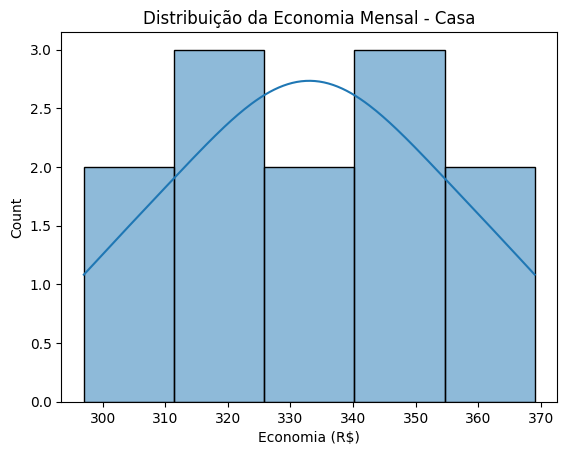

In [50]:
plt.figure()
sns.histplot(df_casa['Economia_R$'], kde=True)
plt.title('Distribuição da Economia Mensal - Casa')
plt.xlabel('Economia (R$)')
plt.show()

## Simulação On-Grid - Empresa


In [51]:
df_consumo_empresa = pd.read_csv('/content/consumo_empresa.csv')

In [52]:
df_empresa = df_consumo_empresa.copy()
df_empresa['Geracao_kWh'] = df_geracao['Geracao_kWh']

df_empresa['Usado_do_Solar'] = np.minimum(
    df_empresa['Consumo_kWh'],
    df_empresa['Geracao_kWh']
)

df_empresa['Injetado_na_Rede'] = np.where(
    df_empresa['Geracao_kWh'] > df_empresa['Consumo_kWh'],
    df_empresa['Geracao_kWh'] - df_empresa['Consumo_kWh'],
    0
)

df_empresa['Usado_da_Rede'] = np.where(
    df_empresa['Consumo_kWh'] > df_empresa['Geracao_kWh'],
    df_empresa['Consumo_kWh'] - df_empresa['Geracao_kWh'],
    0
)

df_empresa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede
0,Jan,1600,380,380,0,1220
1,Fev,1550,360,360,0,1190
2,Mar,1700,400,400,0,1300
3,Abr,1650,420,420,0,1230
4,Mai,1500,450,450,0,1050


### Calculos

In [53]:
# custo e economia
tarifa = 0.90  # R$/kWh

df_empresa['Custo_sem_Solar'] = df_empresa['Consumo_kWh'] * tarifa
df_empresa['Custo_com_Solar'] = df_empresa['Usado_da_Rede'] * tarifa
df_empresa['Economia_R$'] = df_empresa['Custo_sem_Solar'] - df_empresa['Custo_com_Solar']

df_empresa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$
0,Jan,1600,380,380,0,1220,1440.0,1098.0,342.0
1,Fev,1550,360,360,0,1190,1395.0,1071.0,324.0
2,Mar,1700,400,400,0,1300,1530.0,1170.0,360.0
3,Abr,1650,420,420,0,1230,1485.0,1107.0,378.0
4,Mai,1500,450,450,0,1050,1350.0,945.0,405.0


In [54]:
# CO₂ evitado
fator_co2 = 0.084  # kg de CO2 por kWh
df_empresa['CO2_Evitado_kg'] = df_empresa['Usado_do_Solar'] * fator_co2

df_empresa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$,CO2_Evitado_kg
0,Jan,1600,380,380,0,1220,1440.0,1098.0,342.0,31.92
1,Fev,1550,360,360,0,1190,1395.0,1071.0,324.0,30.24
2,Mar,1700,400,400,0,1300,1530.0,1170.0,360.0,33.60
3,Abr,1650,420,420,0,1230,1485.0,1107.0,378.0,35.28
4,Mai,1500,450,450,0,1050,1350.0,945.0,405.0,37.80


In [55]:
df_empresa['Perc_Fotovoltaico_%'] = (df_empresa['Usado_do_Solar'] / df_empresa['Consumo_kWh']) * 100

df_empresa.head()

,Mes,Consumo_kWh,Geracao_kWh,Usado_do_Solar,Injetado_na_Rede,Usado_da_Rede,Custo_sem_Solar,Custo_com_Solar,Economia_R$,CO2_Evitado_kg,Perc_Fotovoltaico_%
0,Jan,1600,380,380,0,1220,1440.0,1098.0,342.0,31.92,23.750000
1,Fev,1550,360,360,0,1190,1395.0,1071.0,324.0,30.24,23.225806
2,Mar,1700,400,400,0,1300,1530.0,1170.0,360.0,33.60,23.529412
3,Abr,1650,420,420,0,1230,1485.0,1107.0,378.0,35.28,25.454545
4,Mai,1500,450,450,0,1050,1350.0,945.0,405.0,37.80,30.000000


In [56]:
total_consumo_empresa = df_empresa['Consumo_kWh'].sum()
total_geracao_empresa = df_empresa['Geracao_kWh'].sum()
total_economia_empresa = df_empresa['Economia_R$'].sum()
total_co2_empresa = df_empresa['CO2_Evitado_kg'].sum()

perc_fv_empresa = (df_empresa['Usado_do_Solar'].sum() / df_empresa['Consumo_kWh'].sum()) * 100

print(f"Consumo anual da empresa: {total_consumo_empresa:.2f} kWh")
print(f"Geração anual da empresa: {total_geracao_empresa:.2f} kWh")
print(f"Economia anual da empresa: R$ {total_economia_empresa:.2f}")
print(f"CO2 evitado no ano: {total_co2_empresa:.2f} kg")
print(f"Cobertura fotovoltaica: {perc_fv_empresa:.2f}%")

Consumo anual da empresa: 19450.00 kWh
Geração anual da empresa: 5020.00 kWh
Economia anual da empresa: R$ 4518.00
CO2 evitado no ano: 421.68 kg
Cobertura fotovoltaica: 25.81%


### Gráficos

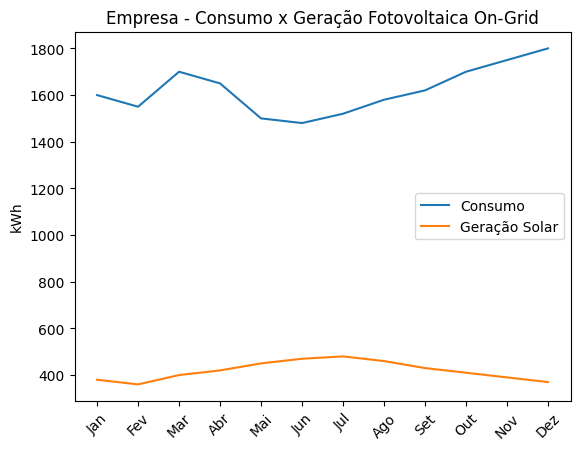

In [57]:
plt.figure()
plt.plot(df_empresa['Mes'], df_empresa['Consumo_kWh'], label='Consumo')
plt.plot(df_empresa['Mes'], df_empresa['Geracao_kWh'], label='Geração Solar')
plt.xticks(rotation=45)
plt.title('Empresa - Consumo x Geração Fotovoltaica On-Grid')
plt.ylabel('kWh')
plt.legend()
plt.show()

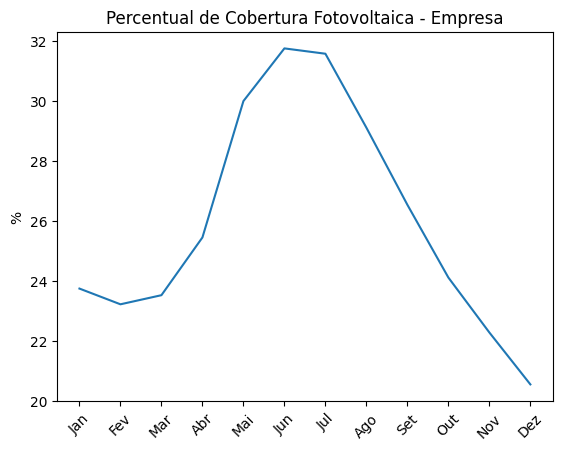

In [58]:
plt.figure()
plt.plot(df_empresa['Mes'], df_empresa['Perc_Fotovoltaico_%'])
plt.xticks(rotation=45)
plt.title('Percentual de Cobertura Fotovoltaica - Empresa')
plt.ylabel('%')
plt.show()

### Histograma


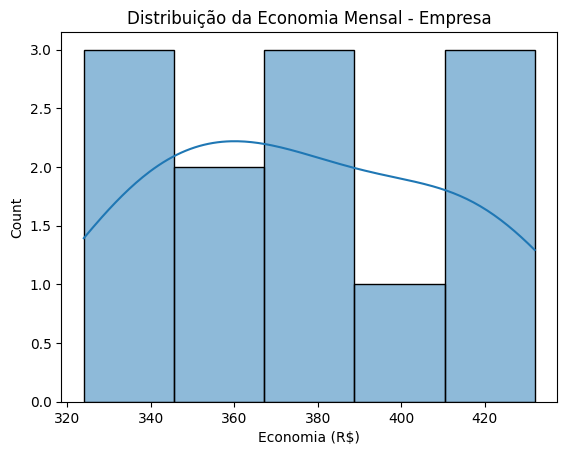

In [59]:
plt.figure()
sns.histplot(df_empresa['Economia_R$'], kde=True)
plt.title('Distribuição da Economia Mensal - Empresa')
plt.xlabel('Economia (R$)')
plt.show()